# K-Nearest Neighbors -- Data Reduction and Imbalancy Analysis

---
<center>
Authors:
<ul>
<li> Valentin Rieu </li>
<li> Amgad Khalil </li>
</ul>
</center>

---

## Imports

In [89]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
from sklearn.model_selection import (train_test_split, cross_val_score)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)
import os

In [3]:
os.listdir()

['analysis_clean.ipynb', 'analysis_val.ipynb', 'analysis_amgad.ipynb']

## Initialization of dataset + training/testing set

In [4]:
n_features = 21
features = [f'attr{str(i)}' for i in range(1, n_features + 1)]
features.append('c')
ds = pd.read_csv('../waveform/waveform.data', names=features)

ds.describe()

,attr1,attr2,attr3,attr4,attr5,attr6,attr7,attr8,attr9,attr10,...,attr13,attr14,attr15,attr16,attr17,attr18,attr19,attr20,attr21,c
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.005144,0.338746,0.672438,0.991610,1.310888,1.997306,2.661806,2.659228,2.672086,2.988668,...,2.678908,2.648632,2.647668,2.000504,1.335032,1.000622,0.661482,0.357300,-0.021378,1.007800
std,1.010130,1.053657,1.187970,1.415239,1.678291,1.814187,2.015774,1.746067,1.663277,1.531506,...,1.651588,1.760113,2.018768,1.810684,1.669949,1.412815,1.197326,1.081337,0.997064,0.818946
min,-3.340000,-3.250000,-4.200000,-3.840000,-3.480000,-2.760000,-3.320000,-3.520000,-3.380000,-1.790000,...,-2.610000,-2.820000,-2.560000,-2.990000,-3.560000,-4.080000,-3.500000,-3.570000,-3.880000,0.000000
25%,-0.680000,-0.372500,-0.150000,-0.020000,0.037500,0.590000,1.110000,1.390000,1.470000,1.880000,...,1.480000,1.360000,1.120000,0.640000,0.070000,-0.010000,-0.180000,-0.350000,-0.690000,0.000000
50%,0.010000,0.340000,0.660000,0.940000,1.120000,1.860000,2.500000,2.720000,2.810000,3.000000,...,2.830000,2.700000,2.490000,1.820000,1.200000,0.940000,0.620000,0.350000,-0.030000,1.000000
75%,0.690000,1.050000,1.460000,1.970000,2.540000,3.340000,4.210000,3.940000,3.940000,4.080000,...,3.932500,3.980000,4.182500,3.330000,2.532500,1.960000,1.470000,1.072500,0.660000,2.000000
max,3.940000,3.880000,4.720000,5.750000,6.500000,7.620000,8.760000,7.840000,7.900000,7.630000,...,7.500000,7.750000,8.720000,7.860000,6.740000,6.200000,5.280000,4.650000,4.010000,2.000000


In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   attr1   5000 non-null   float64
 1   attr2   5000 non-null   float64
 2   attr3   5000 non-null   float64
 3   attr4   5000 non-null   float64
 4   attr5   5000 non-null   float64
 5   attr6   5000 non-null   float64
 6   attr7   5000 non-null   float64
 7   attr8   5000 non-null   float64
 8   attr9   5000 non-null   float64
 9   attr10  5000 non-null   float64
 10  attr11  5000 non-null   float64
 11  attr12  5000 non-null   float64
 12  attr13  5000 non-null   float64
 13  attr14  5000 non-null   float64
 14  attr15  5000 non-null   float64
 15  attr16  5000 non-null   float64
 16  attr17  5000 non-null   float64
 17  attr18  5000 non-null   float64
 18  attr19  5000 non-null   float64
 19  attr20  5000 non-null   float64
 20  attr21  5000 non-null   float64
 21  c       5000 non-null   int64  
dtype

We can notice that the dataset is already clean: no `NaN` values

[]

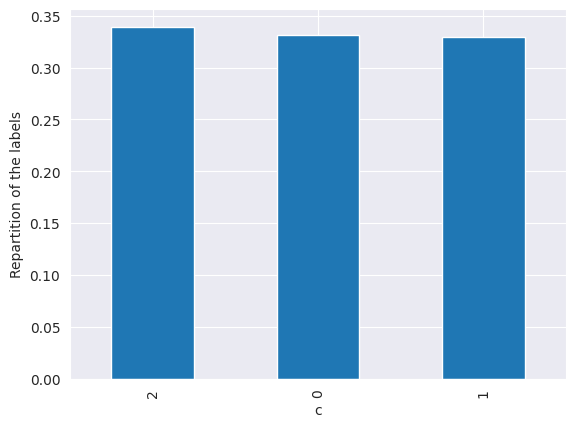

In [6]:
ds['c'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('Repartition of the labels')
plt.plot()

In [7]:
y = ds['c'].copy()
X = ds.iloc[:, :n_features].copy()

We will split training data and test data now, to avoid overfitting and bias. Ratio 4:1 for the training set

Undersampling methods (such as the CNN) will be only performed on the training set. While dimensionality reducing methods
such as PCAs would need to perform a PCA on the training set and only do the corresponding transformation on the test set.

the test set will be left untouched and unused until the end of the transformation pipeline

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # A static random state for troubleshooting

We will make a copy of the training set for the various modification we will perform, to then perform analysis over them
It will be as follows:
- `train_control`: no data reduction, no oversampling
- `train_cond`: training set modified by the Condensed Nearest Neighbor
- `train_imb`: training set with generated imbalancy,
- `train_imb_cond`: training set with generated imbalancy, modified by the CNN

In [39]:
X_train_control, y_train_control = X_train.copy(), y_train.copy()
X_train_cond, y_train_cond = X_train.copy(), y_train.copy()
X_train_imb, y_train_imb = X_train.copy(), y_train.copy()
X_train_imb_cond, y_train_imb_cond = X_train.copy(), y_train.copy()
X_train_pca, y_train_pca = X_train.copy(), y_train.copy()
X_test_pca, y_test_pca = X_test.copy(), y_test.copy()

---

Organization of the tasks:
1. Perform Data Reduction (Reduced NN, Condensed NN),
2. Comparizon between the original dataset and the condensed dataset with a 1NN
3. Compare on the original dataset the time taken to fit and predict a 1NN using speed-up methods
4. Generate imbalancy, analyze the impact of the imbalancy and the impact of using a CNN on an imbalanced dataset
5. Find the best k using cross-validation (both on the original dataset and the condensed dataset)
5. If we have time, perform PCA over the original dataset and compare the impact on the curse of dimensionality

---

## Data Reduction

Since the KNN performance is highly impact by the size of the dataset, we will perform a data reduction algorithm (CNN) to ease the time taken by the KNN, while trying to conserve the accuracy of the model.

Each point can be either:
1. A prototype (points needed for accurate classification),
2. An outlier
1. An absorbed point (point correctly classified by prototypes)

Algorithm is as follows:

1. Find the outlier (incorrectly classified by a 1NN) and remove them from the dataset
2. Take a random point, add it to a storage dataset
3. Classify the dataset with the storage dataset. If a point is correctly classified, remove it from the dataset. If a poiint is missclassified, add it to the storage.

In [10]:
def reduce(x_1, y_1, x_2, y_2, model=None):
    if model is None:
        model = KNeighborsClassifier(n_neighbors=1)
    
    model.fit(x_1, y_1)
    y_pred = model.predict(x_2)
    miss = y_pred != y_2
    tot = np.sum(miss)
    return tot, x_2[~miss], y_2[~miss]

def remove_outliers(X, y):
    
    x1, x2, y1, y2 = train_test_split(X, y, test_size=0.5)
    stabilization = False
    while not stabilization:
        model = KNeighborsClassifier(n_neighbors=1)
        
        tot1, x1, y1 = reduce(x2, y2, x1, y1)
        print(f'total removed from x1: {tot1}')
        
        tot2, x2, y2 = reduce(x1, y1, x2, y2)
        print(f'total removed from x2: {tot2}')
        
        if tot1 + tot2 == 0:
            stabilization = True
    
    newX, newY = pd.concat([x1, x2], axis='index').reset_index(drop=True, inplace=False), pd.concat([y1, y2], axis='index').reset_index(drop=True, inplace=False)
    return newX, newY

def condensate(X, y):
    pass
    
def pipeline_cnn(X, y):
    return remove_outliers(X, y)

In [11]:
newX_train_cond, newy_train_cond = pipeline_cnn(X_train_cond, y_train_cond)
print(newX_train_cond.shape, newy_train_cond.shape)
print(X_train_cond.shape, y_train_cond.shape)

total removed from x1: 461
total removed from x2: 346
total removed from x1: 28
total removed from x2: 2
total removed from x1: 0
total removed from x2: 0
(3163, 21) (3163,)
(4000, 21) (4000,)


---

## Comparison original / CNN

---

## Speed up calculations

---

## Data Imbalancy

We will perform oversampling on the dataset to generate imbalancy, that will have an impact on the performances of our model.

In [12]:
def smote(X, y, l_to_smote=None):
    if l_to_smote is None:
        l_to_smote = 0
    
    index = list(y[y == l_to_smote].index) # indexes of points with label `l_so_smoke`
    model = KNeighborsClassifier()
    model.fit(X, y)
    X_copy = X.copy()
    y_copy = y.copy()
    for i in range(200):
        temp = X[X.index == np.random.choice(index)]
        distance,neighbor=model.kneighbors(temp,n_neighbors=10)[0:2]
        distance = distance[0][1:]
        neighbor = neighbor[0][1:]
        for n in neighbor:
             if y.iloc[n] == l_to_smote:
                    ex_1 = (temp + X.iloc[n]) / 2
                    X_copy = pd.concat([X_copy,ex_1])
                    y_copy = pd.concat([y_copy,pd.Series(l_to_smote)])
    return X_copy,y_copy 

In [13]:
newX_train_imb, newy_train_imb = smote(X_train_imb, y_train_imb, l_to_smote=0)

In [14]:
print(newX_train_imb.shape, newy_train_imb.shape)
print(newy_train_imb.value_counts())

(5354, 21) (5354,)
0    2678
2    1383
1    1293
Name: count, dtype: int64


---

## Tune the hyperparameter k

Optimal Bayes Classification rate = 86% accuracy

We also know that a good estimator for the hyperparameter k is $\sqrt{|S|}$

In [15]:
theoretical_k = round(np.sqrt(X_train_control.shape[0]))
print(theoretical_k)

63


In [16]:
def tune(X, y, k_min, k_max):
    assert k_min <= k_max, f'k_min should be less than k_max, got {k_min} while k_max = {k_max}'
    assert k_min > 0, f'k_min should be greater than 0, got {k_min} '
    k_l = list(range(k_min, k_max+1))

    acc = [0]
    std = [0]
    
    for k in k_l:
        cross_val = cross_val_score(KNeighborsClassifier(n_neighbors=k), X=X_train_control, y=y_train_control, cv=10, scoring='accuracy')
        print(np.mean(cross_val))
        acc.append(np.mean(cross_val))
        std.append(np.std(cross_val))
        
    return acc, std

In [17]:
acc, std = tune(X_train_control, y_train_control, 1, 100)

0.77525
0.76475
0.8052499999999998
0.79325
0.8115
0.8077500000000001
0.8225000000000001
0.8220000000000001
0.83375
0.8314999999999999
0.8317500000000001
0.836
0.8387499999999999
0.8365
0.8387499999999999
0.842
0.8412499999999999
0.843
0.8400000000000001
0.84375
0.84475
0.8474999999999999
0.8472500000000001
0.8474999999999999
0.8452500000000001
0.84825
0.8494999999999999
0.85175
0.8467500000000001
0.8494999999999999
0.8450000000000001
0.84925
0.8465
0.8504999999999999
0.8460000000000001
0.851
0.8487500000000001
0.85125
0.85
0.8505
0.8497499999999999
0.8524999999999998
0.85
0.85125
0.85
0.85125
0.8504999999999999
0.8547499999999999
0.8494999999999999
0.8532500000000001
0.8497499999999999
0.85125
0.8497499999999999
0.8539999999999999
0.851
0.853
0.8504999999999999
0.8530000000000001
0.853
0.8545
0.8532499999999998
0.8549999999999999
0.853
0.8554999999999999
0.8545
0.8557500000000001
0.8564999999999999
0.8564999999999999
0.8557500000000001
0.85825
0.8547499999999999
0.857
0.855749999999999

In [18]:
print(acc.index(max(acc)))
print(max(acc))

70
0.85825


In [19]:
acc_plus = np.add(acc, std)
acc_plus[acc_plus > 0.86] = 0.86
acc_minus = np.subtract(acc, std)

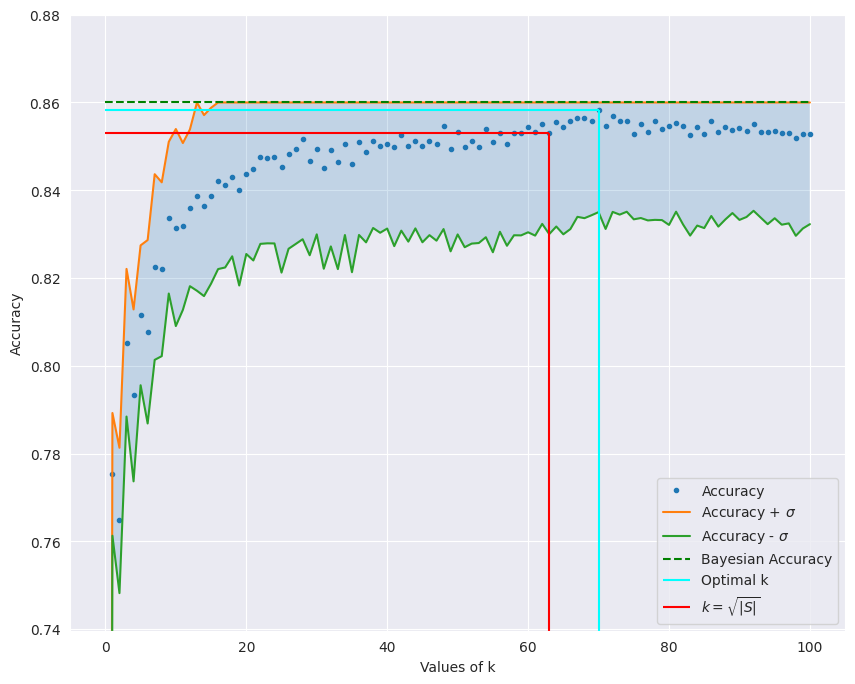

In [20]:
fig, ax = plt.subplots(figsize=(10, 8))
xaxis = list(range(0, 101))
ax.plot(xaxis, acc, '.', label='Accuracy')
ax.plot(xaxis, acc_plus,label='Accuracy + $\sigma$')
ax.plot(xaxis, acc_minus, label='Accuracy - $\sigma$')

ax.fill_between(xaxis, acc_plus, acc_minus, alpha=0.2)

ax.hlines(xmin=0, xmax=100 ,y=0.86, color='green',linestyle='--', label='Bayesian Accuracy')
ax.hlines(xmin=0, xmax=acc.index(max(acc)), y=max(acc), color='cyan')
ax.hlines(xmin=0, xmax=theoretical_k, y=acc[theoretical_k], color='r')

ax.vlines(ymin = min(acc[1:]) - max(std[1:]), ymax=max(acc), x=acc.index(max(acc)), color='cyan', label='Optimal k')
ax.vlines(ymin = min(acc[1:]) - max(std[1:]), ymax=acc[theoretical_k], x=theoretical_k, label='$k = \sqrt{|S|}$', color='r')
plt.ylim(min(acc[1:]) - max(std[1:]), 0.88)
plt.xlabel('Values of k')
plt.ylabel("Accuracy")
plt.legend()
plt.show()

---

## PCA (Principal Component Analysis)

Method:

1. Normalize the data (0-mean value)
2. Covariance matrix
3. Eigenvectors and eigenvalues
4. Selection of principal components,
5. Data transformation (this step is to be applied to the test set as well)

In [176]:
def normalize(X: pd.DataFrame):
    mean = X.mean()
    std = X.std()
    normalized = (X - mean) / std
    return normalized

def find_eigen(X):
    cov = np.round(np.cov(X.T), 2)
    print(cov.shape)
    eig_val, eig_vec = np.linalg.eig(cov)
    indices = np.arange(0,len(eig_val), 1)
    indices = ([x for _,x in sorted(zip(eig_val, indices))])[::-1]
    eig_val = eig_val[indices]
    eig_vec = eig_vec[:,indices]
    print(eig_val.shape, eig_vec.shape)
    return eig_val, eig_vec

def explained_var(eig_val, min_exp_var = 0.97):
    # Get explained variance
    sum_eig_val = np.sum(eig_val)
    explained_variance = eig_val/ sum_eig_val
    print("Explained variance ", explained_variance)
    cumulative_variance = np.cumsum(explained_variance)
    print("Cumulative variance ", cumulative_variance)
    
    # Plot explained variance
    plt.plot(np.arange(0, len(explained_variance), 1), cumulative_variance)
    plt.xlabel("Number of components")
    plt.ylabel("Explained variance")
    plt.show()
    
    # We will keep k components, s.t we have the minimal k that makes explained variance above 0.95
    return np.argmax(cumulative_variance >= min_exp_var) + 1

def transform(X:pd.DataFrame, eig_vectors):
    pca_data = X @ eig_vectors
    return pca_data


def pipeline_pca(X_train, X_test):
    X_norm = normalize(X_train)
    eig_val, eig_vec = find_eigen(X_norm)
    k = explained_var(eig_val)
    print
    features = {j: f'attr{i}' for j, i in enumerate(range(1, k+1))}
    eig_vec = eig_vec[:, :k]
    X_train_t = transform(X_train, eig_vec).rename(columns=features)
    X_test_t = transform(X_test, eig_vec).rename(columns=features)
    return X_train_t, X_test_t
    

(21, 21)
(21,) (21, 21)
Explained variance  [0.37737762 0.15545534 0.04917315 0.04662796 0.04220338 0.04179927
 0.03306016 0.03215815 0.02417119 0.02286709 0.02026641 0.01906415
 0.01744103 0.01702511 0.01667442 0.01578203 0.01548453 0.01494093
 0.01450889 0.01223804 0.01168114]
Cumulative variance  [0.37737762 0.53283296 0.58200611 0.62863407 0.67083745 0.71263672
 0.74569688 0.77785503 0.80202623 0.82489331 0.84515973 0.86422388
 0.88166491 0.89869002 0.91536444 0.93114646 0.94663099 0.96157192
 0.97608082 0.98831886 1.        ]


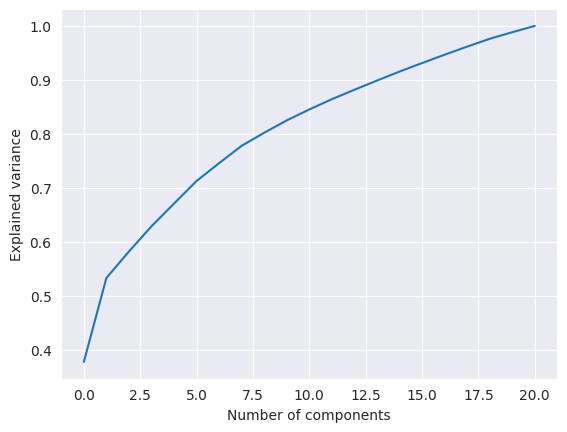

In [173]:
X_train_pca, X_test_pca = pipeline_pca(X_train, X_test)

In [174]:
print(X_test_pca.shape)

(1000, 12)


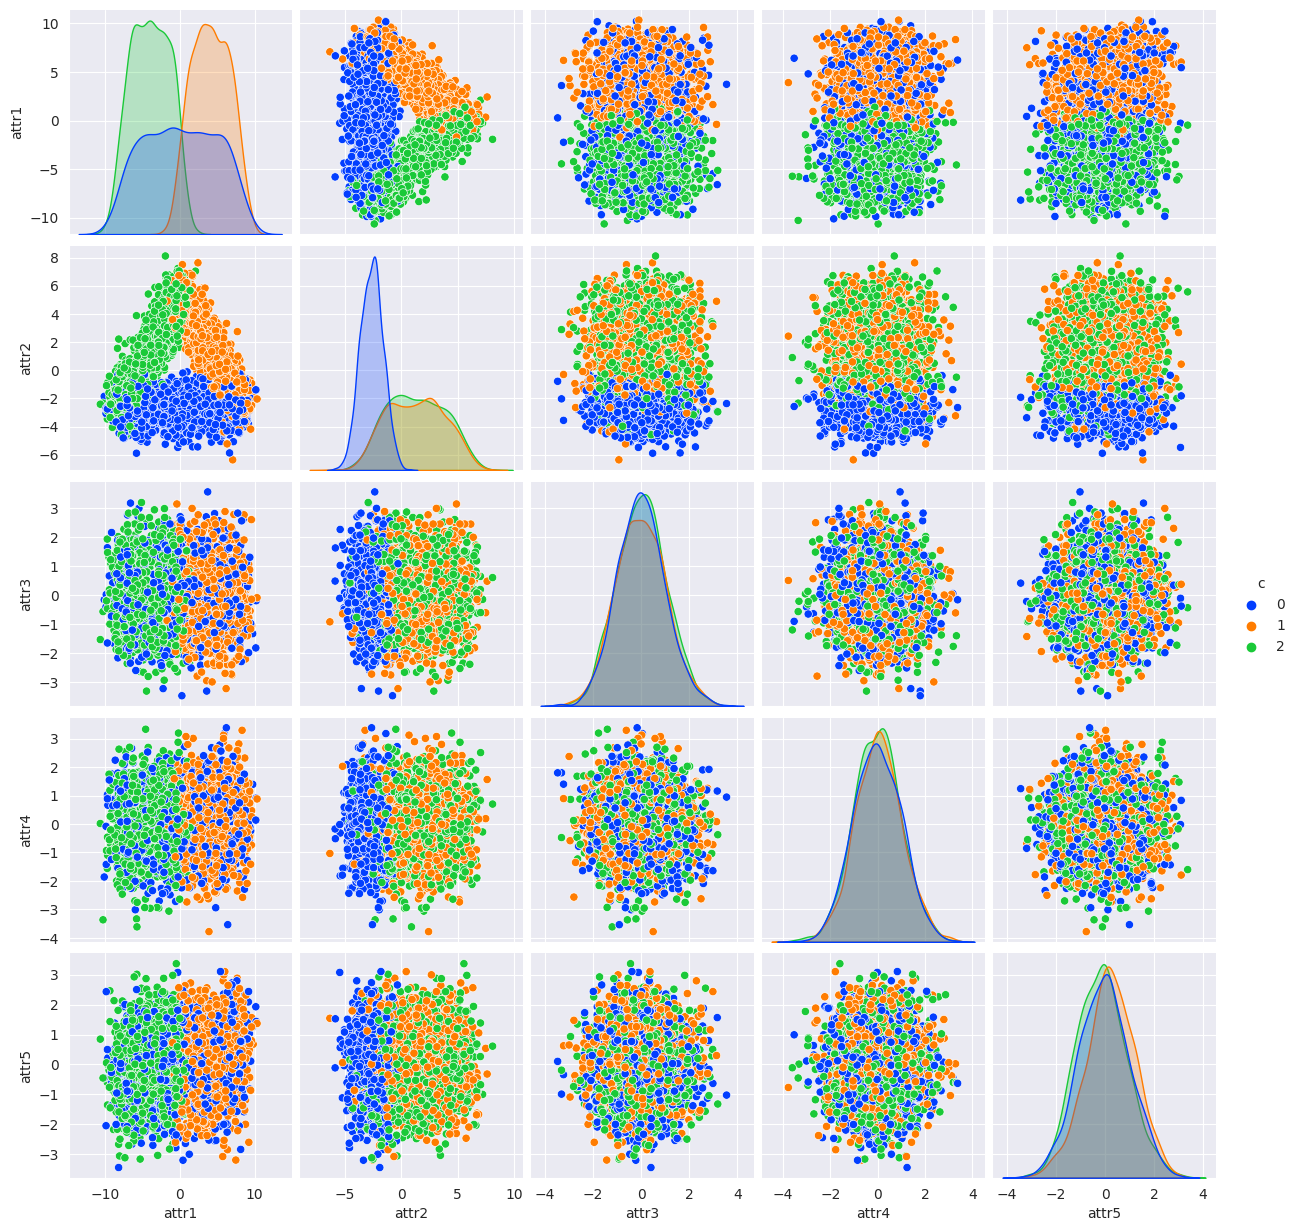

In [175]:
columns = X_train_pca.columns[0:5].tolist() + ['c']
ds_pca = pd.concat([X_train_pca, y_train_pca], axis=1)

sns.pairplot(ds_pca[columns], hue='c', palette='bright')
plt.show()

[]

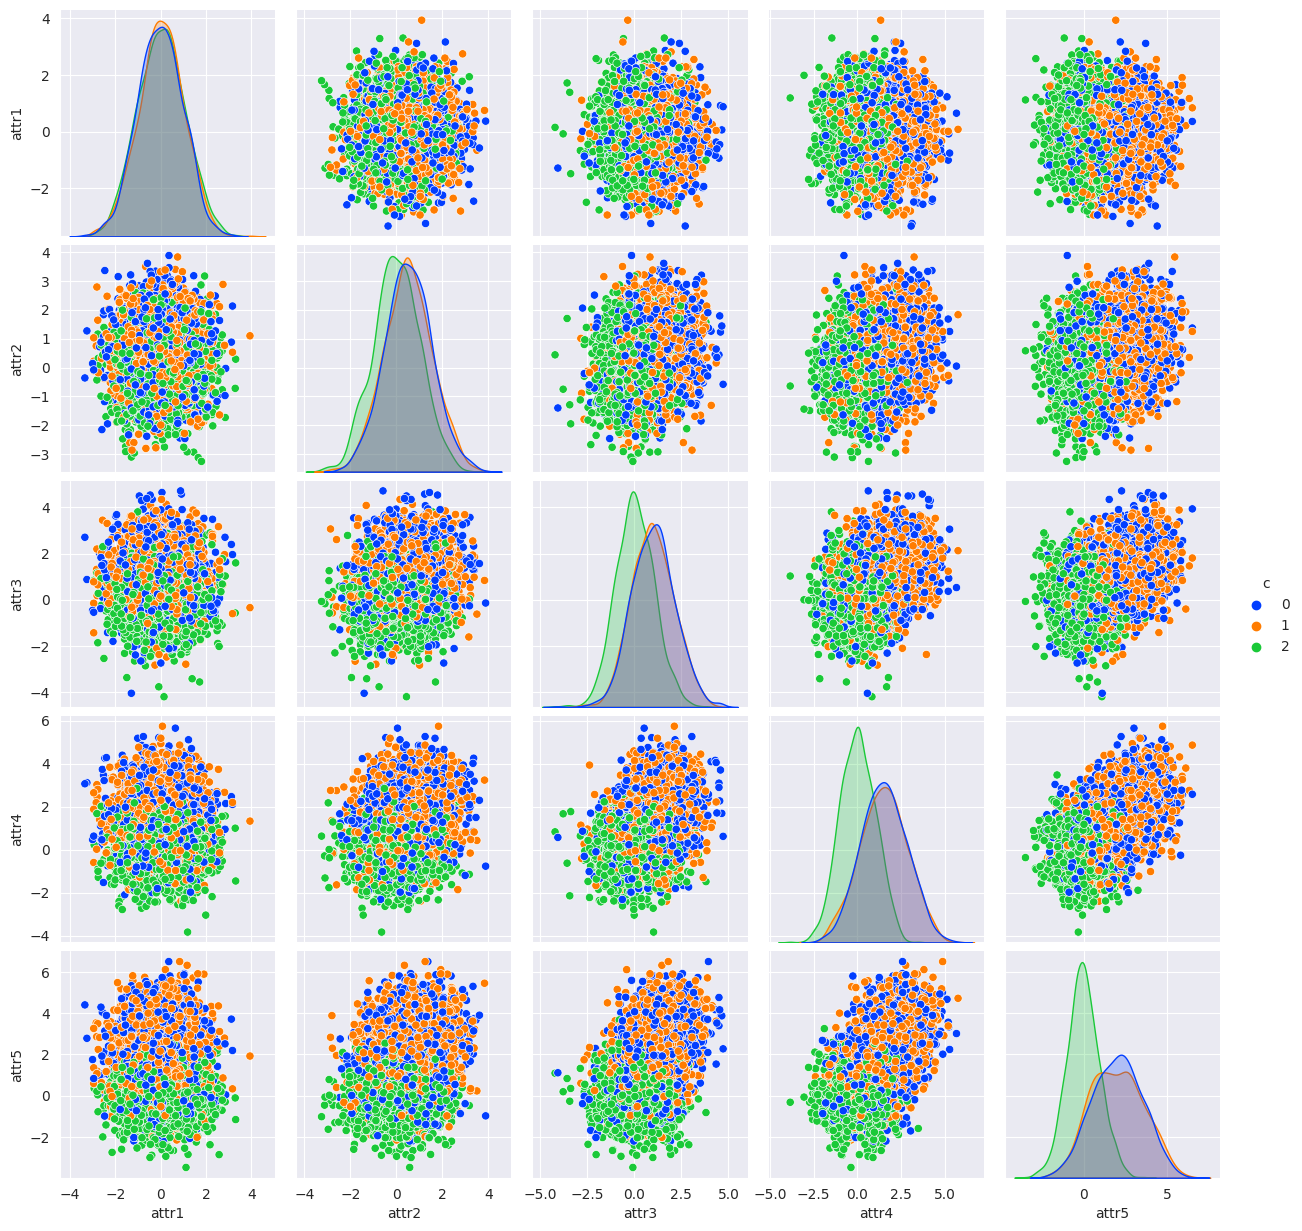

In [170]:
sns.pairplot(ds[columns], hue='c', palette='bright')
plt.plot()

In [160]:
X_train_pca.describe()

,attr1,attr2,attr3,attr4,attr5,attr6,attr7,attr8,attr9,attr10,attr11,attr12,attr13,attr14,attr15,attr16,attr17,attr18,attr19
count,4.000000e+03,4000.000000,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03,4.000000e+03
mean,-3.907985e-17,0.000000,1.598721e-17,8.881784e-18,-7.993606e-18,6.661338e-18,1.132427e-17,-1.154632e-17,-2.486900e-17,1.421085e-17,1.176836e-17,-1.687539e-17,2.486900e-17,7.105427e-18,2.664535e-17,-3.907985e-17,1.598721e-17,2.131628e-17,3.375078e-17
std,4.782225e+00,2.839238,1.016288e+00,1.001772e+00,1.039608e+00,1.024018e+00,1.038929e+00,1.073248e+00,1.075526e+00,1.006290e+00,1.024726e+00,1.012031e+00,1.009867e+00,9.980903e-01,1.000187e+00,1.003676e+00,1.015200e+00,1.011073e+00,9.987544e-01
min,-1.063451e+01,-6.352020,-3.469122e+00,-3.779912e+00,-3.448200e+00,-4.000592e+00,-3.656017e+00,-4.112644e+00,-3.587936e+00,-3.274873e+00,-3.814039e+00,-4.496055e+00,-3.505960e+00,-3.891242e+00,-3.262508e+00,-3.712338e+00,-3.893942e+00,-3.603408e+00,-3.981981e+00
25%,-4.058887e+00,-2.335415,-6.965789e-01,-6.872581e-01,-7.039622e-01,-6.857014e-01,-6.803498e-01,-7.459022e-01,-7.348983e-01,-6.768111e-01,-6.995654e-01,-6.664498e-01,-6.730905e-01,-6.728153e-01,-6.834182e-01,-6.641418e-01,-6.891998e-01,-6.777967e-01,-6.740143e-01
50%,-1.350880e-01,-0.655821,-4.180085e-03,1.177192e-04,2.915826e-04,-6.365317e-03,1.021954e-03,-3.524311e-02,-7.806262e-03,-8.508906e-03,2.124982e-03,-3.055081e-03,-3.415952e-03,-8.123735e-03,5.049369e-03,1.397437e-03,7.629117e-03,6.743161e-03,4.013736e-03
75%,4.015413e+00,2.321006,6.827437e-01,6.594135e-01,6.937414e-01,6.936344e-01,6.993927e-01,7.414107e-01,7.363216e-01,6.692357e-01,6.965697e-01,6.669671e-01,6.663504e-01,6.799418e-01,6.647276e-01,6.819189e-01,6.712945e-01,6.877090e-01,6.760616e-01
max,1.034365e+01,8.113179,3.551691e+00,3.380032e+00,3.370926e+00,3.420058e+00,3.969545e+00,4.159582e+00,3.524890e+00,3.349751e+00,3.308413e+00,4.205849e+00,3.742496e+00,3.191060e+00,3.450330e+00,4.069847e+00,3.637406e+00,3.390777e+00,3.414375e+00
